In [2]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import math as m

## . . Import all of the libraries required for this Notebook
import matplotlib.image as mpimg
import scipy.ndimage as ndimage

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
''')

![title](data/TITLE.png)

### <h1><center>Module 6: 2D Fourier Transforms </center></h1>

In the previous section we examined a number of theoretical and practical issues regarding the 1D Fourier Transform. Of course, the world is seldom 1D and we need to be able to apply similar Fourier analysis techniques in 2D (and even higher dimensions!).  Importantly, moving to higher dimensions also allows us apply these techniques not just to different types of geophysical data sets (e.g., mag/gravity maps, 2D Seismic/GPR transects) but also to look at interesting objects such as images which can provide insight into what is happening in the Fourier domain.

Let's begin this section by asking the following question: What would the 2D Fourier Transforms of the following images look like?

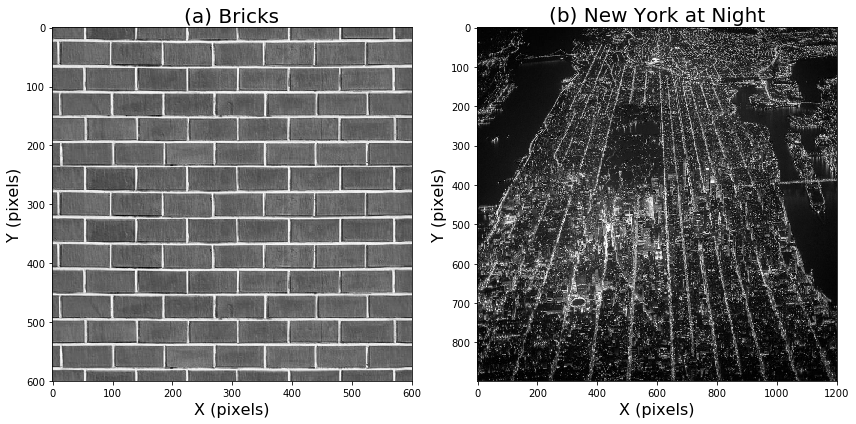

In [3]:
## . . Close previous plotting sessions
plt.close('all')

# . . Read in image
img1 = mpimg.imread('Fig/2.3_BRICKS.png')

# . . Plotting section
plt.figure(figsize=(12, 6))
plt.subplot(121)

# . . Trick to transform color image to grayscale
plt.imshow(np.sum(img1,axis=2)/3.,aspect='auto',cmap='gray')
plt.xlabel('X (pixels)',size=16)
plt.ylabel('Y (pixels)',size=16)
plt.title('(a) Bricks',size=20)

# . . Read in image
img2 = mpimg.imread('Fig/2.3_NEW_YORK.png')

plt.subplot(122)

# . . Trick to transform color image to grayscale
plt.imshow(np.sum(img2,axis=2)/3,aspect='auto',cmap='gray')
plt.xlabel('X (pixels)',size=16)
plt.ylabel('Y (pixels)',size=16)
plt.title('(b) New York at Night',size=20)

# . . Let's look at the output
plt.tight_layout() 
plt.show()

**Figure 1. Examples of 2D "signals" of which we might be interested in applying the 2D Fourier transform and examining or maninpulating the spectral content.**

## Bricks and New York at Night - Redux

Let's now look at these image's 2D Fourier magnitude spectra.  For now, we are going to calculate them in a way that is a bit more straightforward than the 1D transforms.  This is because the images we are dealing with are a function of **pixels**, which is not really a physical unit and thus it is harder to assign a meaning to what the Fourier components represent (other than 1/wavenumber).  To calculate the 2D Fourier transform we can do the following:

    fft_img = np.fft.fft2(img)/(nx*ny)
    
where *nx* and *ny* are the dimensions of the image and are included as a normalization factor.  
 
 Just like in 1D Fourier Transforms, the layout of the 2D Fourier transform will start at $[k_x,k_y]=[0,0]$1/pixels and then move along the diagonal until reaching the maximum $[k_x,k_y]$ values half way.  It will then switch immediately to the minimum $[k_x,k_y]$ and progress back toward $[k_x,k_y]=[0,0]$1/pixels.  Thus, we again need to use the *np.fft.fftshift()*  in order to put the 2D Fourier Transform of the image in order for them to make sense. In the images below we are going to look at the Fourier magnitude spectra. Thus, we will plot
 
     magnitude_spectrum = 20*np.log(np.abs(np.fft.fftshift(fft_img))) 
 
where I have included the *20 np.log()* terms because the wavenumbers away from $[k_x,k_y]=[0,0]$1/pixels tend to be very small!  Plotting it this way will emphasize the small values since and represents a "dB down" scenario. **Note that if you are plotting a 2D Fourier domain spectrum with the 20 np.log() scaling already applied on it, you will have to undo this scaling if you want to take the inverse 2D Fourier transform.** 

Let's now take a look at the Fourier power spectrum of the bricks:

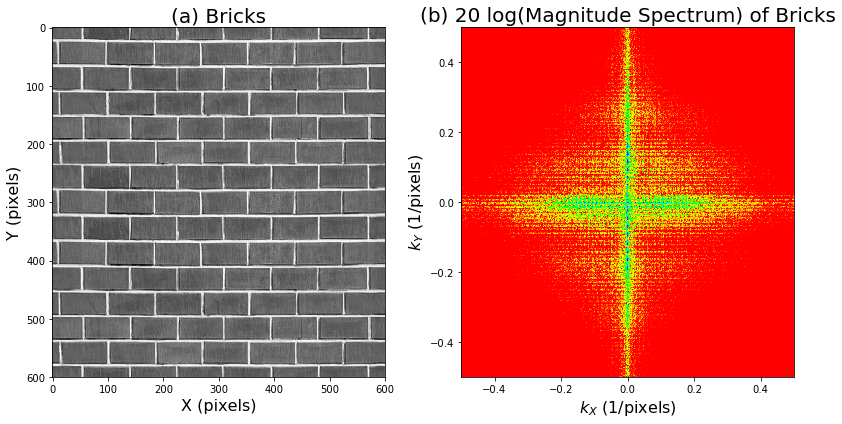

In [30]:
# . . Read in image
img = mpimg.imread('Fig/2.3_BRICKS.png')

# . . Take average of all three dimensions by summing along
img_one = np.sum(img,axis=2)/3.

# . . Number of points
nx,ny = np.size(img,0),np.size(img,1)

# . . Take a scaled 2D Fourier transform
fft_img =np.fft.fft2(img_one)/(nx*ny)

# . . Calculate the Fourier Spectrum 
magnitude_spectrum = np.abs(np.fft.fftshift(fft_img)) 

# . . Plotting section
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_one,aspect='auto',cmap='gray')
plt.xlabel('X (pixels)',size=16)
plt.ylabel('Y (pixels)',size=16)
plt.title('(a) Bricks',size=20)

plt.subplot(122)
# . . Uncomment to see how it looks without log scaling!
#plt.imshow((magnitude_spectrum),aspect='auto',cmap='hsv',extent=[-0.5,0.5,-0.5,0.5],vmin=0,vmax=0.01)
plt.imshow(20*np.log(magnitude_spectrum),aspect='auto',cmap='hsv',extent=[-0.5,0.5,-0.5,0.5],vmin=-200,vmax=-50)
plt.xlabel('$k_X$ (1/pixels)',size=16)
plt.ylabel('$k_Y$ (1/pixels)',size=16)
plt.title('(b) 20 log(Magnitude Spectrum) of Bricks',size=20)

# . . Let's look at the output
plt.tight_layout() 
plt.show()

**Figure 2. (a) Bricks image from above along with its (b) Fourier magnitude spectrum. Note that I have applied the 20 log() scaling just to better visualize the spectral components. This should only be applied with looking at the spectrum!**

Let's now look at New York City and its 2D Fourier Magnitude spectra:

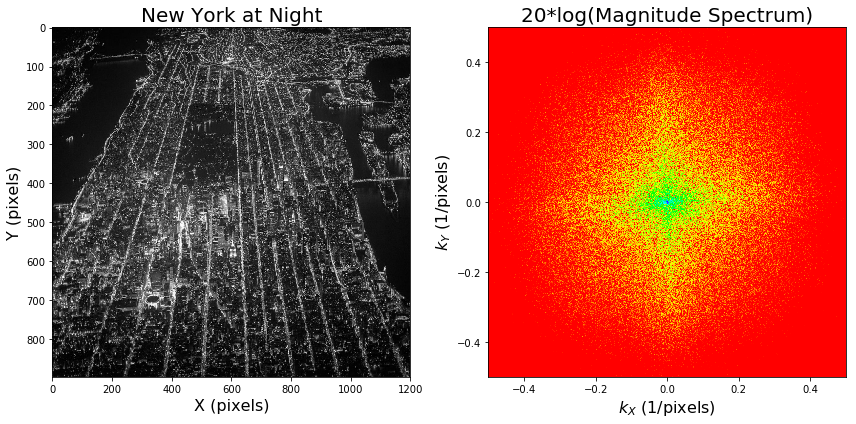

In [29]:
# . . Read in image
img = mpimg.imread('Fig/2.3_NEW_YORK.png')

# . . Take average of all thre dimensions by summing along
img_one = np.sum(img,axis=2)/3.

# . . Number of points
nx,ny = np.size(img,0),np.size(img,1)

# . . Take a 2D Fourier transform
fft_img = np.fft.fft2(img_one)/(nx*ny)

# . . Calculate the spectrum 
magnitude_spectrum = np.abs(np.fft.fftshift(fft_img))

# . . Plotting section
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_one,aspect='auto',cmap='gray')
plt.xlabel('X (pixels)',size=16)
plt.ylabel('Y (pixels)',size=16)
plt.title('New York at Night',size=20)

plt.subplot(122)
plt.imshow(20*np.log(magnitude_spectrum),aspect='auto',cmap='hsv',extent=[-0.5,0.5,-0.5,0.5],vmin=-190,vmax=-40)
plt.xlabel('$k_X$ (1/pixels)',size=16)
plt.ylabel('$k_Y$ (1/pixels)',size=16)
plt.title('20*log(Magnitude Spectrum)',size=20)

# . . Let's look at the output
plt.tight_layout() 
plt.show()

**Figure 3. (a) Image of New York City at night along with its (b) Fourier magnitude spectrum. Note that I have applied the 20 log(MagSpectrum) scaling just to better visualize the spectral components. This should only be applied when examining spectra!**

## A more straightforward example

While the above 2D FFTs are interesting and show a lot of structure, it's easier to start looking at something a little bit more straightforward.  Below I have plotted on the left two dipping lines, one with brighter amplitudes at $45^\circ$ and the other with weaker amplitudes at $30^\circ$.  The right hand image shows the 2D Fourier transform of the figure on left.

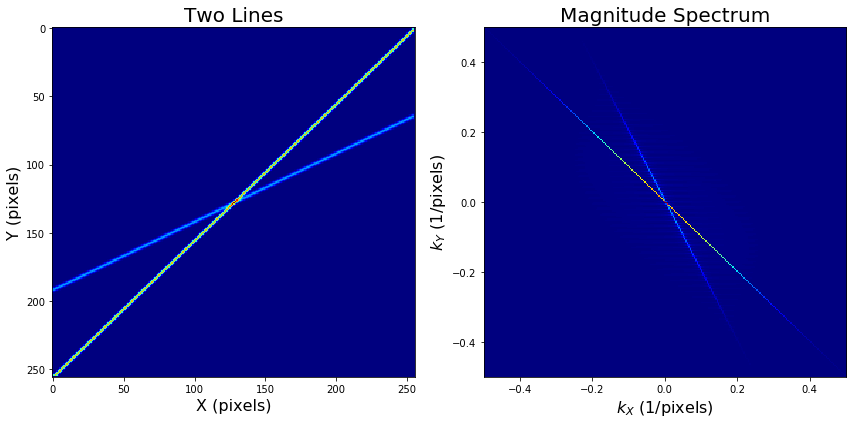

In [7]:
# . . Make two lines example
nx,ny=256,256
s=(nx,ny) # . . Make tuple with correct dimensions
img = np.zeros(s)

xline = range(0,nx-1,1)
yline = range(0,ny-1,1)

# . . Let's create some lines
for ix in xline:
    for iy in yline:
        iyx1 = (ix-128)+0.5*(iy-128) # line at 30 degrees
        iyx2 = (ix-128)+    (iy-128) # line at 45 degrees
        img[ix,iy] += np.exp(-(iyx1/np.sqrt(2))**2) + 2.5*np.exp(-(iyx2/np.sqrt(2))**2) # Gaussian lines (smooth)

# . . Take a 2D Fourier transform
fft_img =np.fft.fft2(img)/(nx*ny)

# . . Calculate the spectrum 
magnitude_spectrum = np.abs(np.fft.fftshift(fft_img))

# . . Plotting section
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img,aspect='auto',cmap='jet')
plt.xlabel('X (pixels)',size=16)
plt.ylabel('Y (pixels)',size=16)
plt.title('Two Lines',size=20)

plt.subplot(122)
plt.imshow(magnitude_spectrum,aspect='auto',cmap='jet',extent=[-0.5,0.5,-0.5,0.5])
plt.xlabel('$k_X$ (1/pixels)',size=16)
plt.ylabel('$k_Y$ (1/pixels)',size=16)
plt.title('Magnitude Spectrum',size=20)

# . . Let's look at the output
plt.tight_layout() 
plt.show()

**Figure 4. (a) Image of two lines with different dip and amplitude along with their (b) Fourier magnitude spectrum.**

**Q1:** What do you notice about the relationship between dips between the 2D physical and 2D Fourier domains?

**Q2:** How does this relate to the Bricks and New York City at Night image examples above?

# 2D Fourier Transforms - The Basics

We define the forward **2D Fourier Transform** operator $\mathcal{F_{2D}}$ that acts on a 2D signal $h(x,y)$  according to

$$ 
\begin{eqnarray}
\mathcal{F_{2D}}\left[h(x,y)\right]=\widehat{H}(k_x,k_y) &=& 
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} h(x,y) \,\mathrm{e}^{-i \mathbf{k}\cdot \mathbf{x}}\,\mathrm{d}x\,\mathrm{d}y\tag{1a}\\
&=&
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} h(x,y) \,\mathrm{e}^{-i (k_x x+k_y y)}\,\mathrm{d}x\,\mathrm{d}y\tag{1b}
\end{eqnarray}
$$

where $\mathbf{x}=[x,y]$ are the two spatial variables (not the greatest notation) and $\mathbf{k}=[k_x,k_y]$ are the two Fourier conjugate domain variables and are termed the **spatial wavenumbers** that are equivalent to angular frequency.  Note: you may often see the pair $[u,v]$ used in place of $[k_x,k_y]$ as these are commonly used in the field of complex analysis to represent the 2D complex plane.

The **2D Inverse Fourier Transform** operator, denoted $\mathcal{F}^{-1}_{2D}$, is given by:

$$ 
\begin{eqnarray}
\mathcal{F}^{-1}_{2D}\left[\widehat{H}(k_x,k_y)\right]=
h(x,y) &=& \frac{1}{4\pi^2} \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \widehat{H}(k_x,k_y)  \,\mathrm{e}^{i\mathbf{k}\cdot\mathbf{x}}\,\mathrm{d}k_x\,\mathrm{d}k_y \tag{2a} \\
&=& \frac{1}{4\pi^2} \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \widehat{H}(k_x,k_y)  \,\mathrm{e}^{i(k_x x+k_y y)}\,\mathrm{d}k_x\,\mathrm{d}k_y
\tag{2b} 
\end{eqnarray}
$$

You'll note that the scaling factor is given by $\frac{1}{2^N\pi^N}$ where $N$ is the dimensionality of the Fourier Transform.  Thus, a 5D Fourier Transform (yes, I've done one) would be scaled by $\frac{1}{32\pi^5}$.

## 2D Fourier Basis Functions

Probably not surprisingly, the basis functions for the 2D Fourier Transforms are *cosine* and *sine* funtions.  This is because

$$ \mathrm{e}^{\pm i \mathbf{k}\cdot\mathbf{x}} = \mathrm{e}^{\pm i \left(k_x x + k_y x\right)}= \mathrm{cos} \left( \mathbf{k}\cdot\mathbf{x}\right) \pm i\, \mathrm{sin}\left( \mathbf{k}\cdot\mathbf{x} \right)= \mathrm{cos} \left( k_x x + k_y x\right) \pm i\, \mathrm{sin}\left( k_x x + k_y x\right), \tag{3} $$

where the *sin* and *cos* are now **2D functions** that are related to [directional cosines](https://en.wikipedia.org/wiki/Direction_cosine) on the (x,y) plane.  The maxima and minima of, e.g., $\mathrm{cos}\left( \mathbf{k}\cdot\mathbf{x}\right)$ occur when 

$$\mathbf{k}\cdot\mathbf{x} = n\pi, \quad n=0,\pm 1, \pm 2, ..., \tag{4}$$

which are equally spaced lines with normal ${\bf n} = \mathbf{k}$ and wavelength $\lambda$ given by:

$$\lambda=\frac{2\pi}{|\mathbf{k}|}=\frac{2\pi}{\sqrt{k_x^2+k_y^2}}. \tag{5}$$

Let's take a look at some of these basis functions!

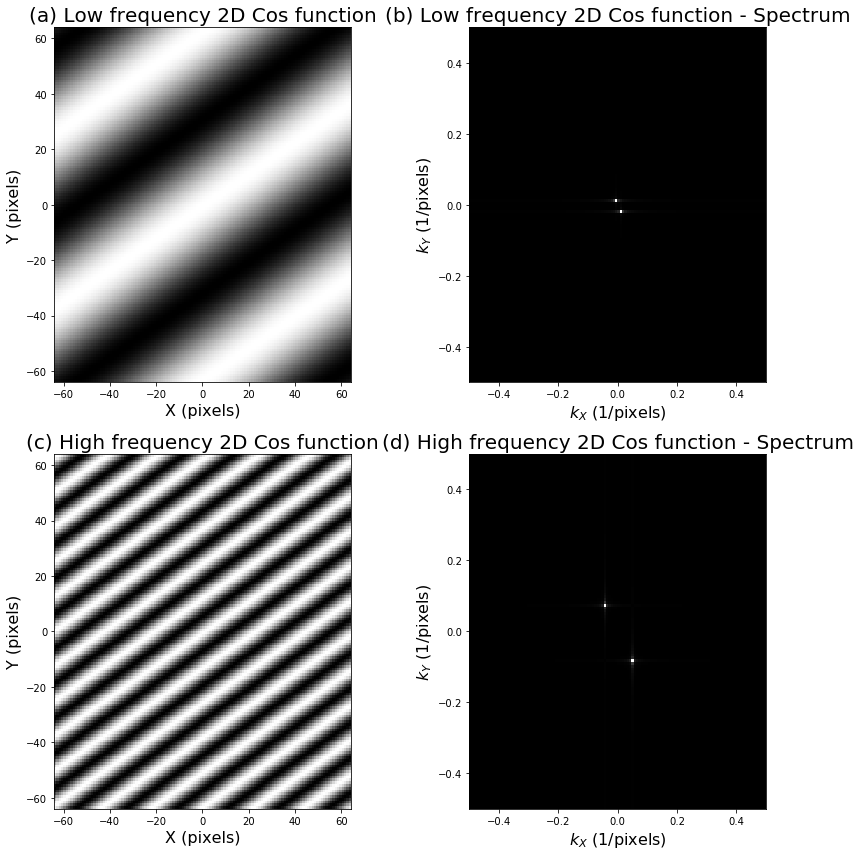

In [9]:
# . . Make two examples of a 2D cos basis function
nx,ny=128,128         # . . Dimensions
s=(nx,ny)             # . . Make tuple with correct dimensions
img_low = np.zeros(s) # . . Lower freq basis function
img_hgh = np.zeros(s) # . . Higher freq basis function

xline = range(0,nx,1)
yline = range(0,ny,1)

# . . Let's create some lines
for ix in xline:
    for iy in yline:
        iyx1 = (ix-nx/2)+1/np.sqrt(3)*(iy-ny/2)      # equation of line with 30º slope 
        img_low[ix,iy] = np.cos(0.1*iyx1)   # Lower spatial wavenumber
        img_hgh[ix,iy] = np.cos(0.5*iyx1)   # Higher spatial wavenumber

# . . Take a 2D Fourier transform using the numpy package (and normalize)
fft_low = np.fft.fft2(img_low)/(nx*ny)
fft_hgh = np.fft.fft2(img_hgh)/(nx*ny)

# . . Calculate the 2D spectra (have to include a fftshift to center spectrum) 
mag_spec_low = np.abs(np.fft.fftshift(fft_low)) 
mag_spec_hgh = np.abs(np.fft.fftshift(fft_hgh)) 

# . . Plotting section
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(img_low,aspect='auto',cmap='gray',extent=[-nx/2,nx/2,-ny/2,ny/2])
plt.xlabel('X (pixels)',size=16)
plt.ylabel('Y (pixels)',size=16)
plt.title('(a) Low frequency 2D Cos function',size=20)

plt.subplot(222)
plt.imshow(mag_spec_low,aspect='auto',cmap='gray',extent=[-0.5,0.5,-0.5,0.5])
plt.xlabel('$k_X$ (1/pixels)',size=16)
plt.ylabel('$k_Y$ (1/pixels)',size=16)
plt.title('(b) Low frequency 2D Cos function - Spectrum',size=20)

plt.subplot(223)
plt.imshow(img_hgh,aspect='auto',cmap='gray',extent=[-nx/2,nx/2,-ny/2,ny/2])
plt.xlabel('X (pixels)',size=16)
plt.ylabel('Y (pixels)',size=16)
plt.title('(c) High frequency 2D Cos function',size=20)

plt.subplot(224)
plt.imshow(mag_spec_hgh,aspect='auto',cmap='gray',extent=[-0.5,0.5,-0.5,0.5])
plt.xlabel('$k_X$ (1/pixels)',size=16)
plt.ylabel('$k_Y$ (1/pixels)',size=16)
plt.title('(d) High frequency 2D Cos function - Spectrum',size=20)

plt.tight_layout() 
plt.show()

**Figure 5. (a) Low-frequency 2D cos function dipping at a 30º angle. (b) 2D Power spectrum of (a). (c) High-frequency 2D cos function again dipping at a 30º angle.  (d) 2D Power spectrum of (c).**

You'll notice that 2D Fourier Tranform of the basis function is like that of the 1D Fourier Transform - two $\delta$-functions but in opposing quadrants instead of positive/negative!  You'll also notice that the higher frequency you go, the greater the separation between the delta function pair.

Let's look at a few more examples with increasing complexity:

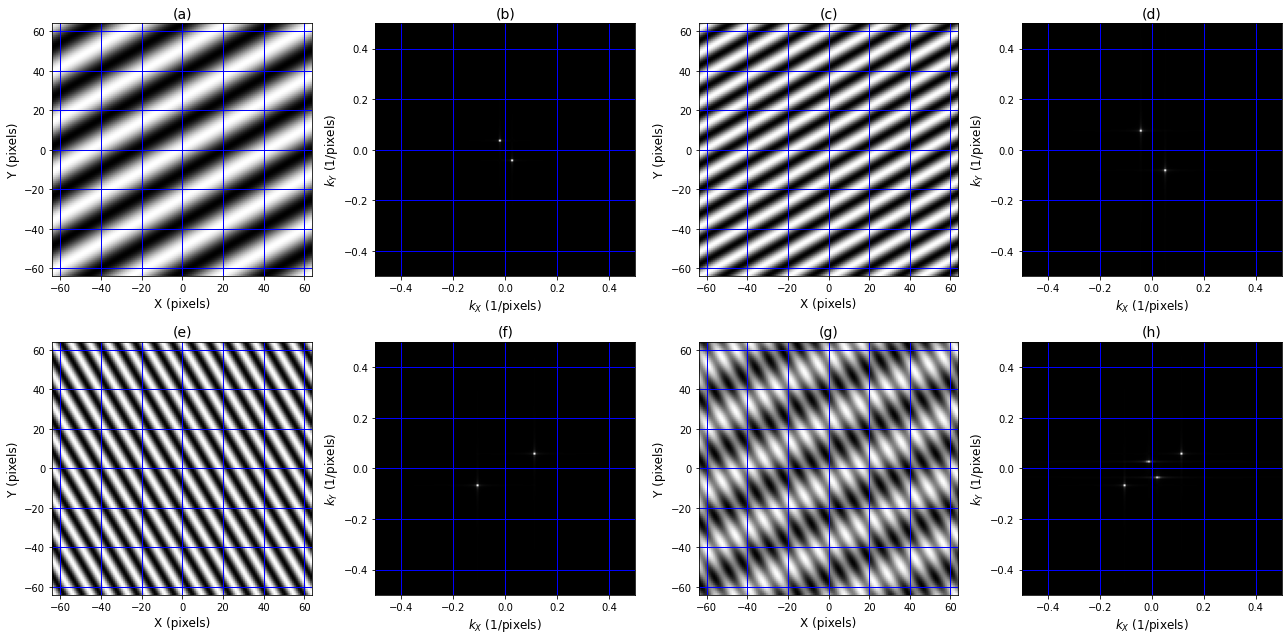

In [5]:
def F2D_space(img,nx,ny,title):
    im = plt.imshow(img,aspect='auto',cmap='gray',extent=[-nx/2,nx/2,-ny/2,ny/2])
    ax = plt.gca()
    ax.grid(color='b', linestyle='-', linewidth=1)
    plt.xlabel('X (pixels)',size=12)
    plt.ylabel('Y (pixels)',size=12)
    plt.title(title,size=14)

def F2D_wavenumber(img,title):
    im = plt.imshow(img,aspect='auto',cmap='gray',extent=[-0.5,0.5,-0.5,0.5])
    ax = plt.gca()
    ax.grid(color='b', linestyle='-', linewidth=1)
    plt.xlabel('$k_X$ (1/pixels)',size=12)
    plt.ylabel('$k_Y$ (1/pixels)',size=12)
    plt.title(title,size=14)
    
# . . Make two examples of a 2D cos basis function
nx,ny=128,128         # . . Dimensions
s=(nx,ny)             # . . Make tuple with correct dimensions
img_low = np.zeros(s) # . . Lower freq basis function
img_hgh = np.zeros(s) # . . Higher freq basis function
img_3   = np.zeros(s) # . . Lower freq basis function
img_4   = np.zeros(s) # . . Higher freq basis function

xline = range(0,nx,1)
yline = range(0,ny,1)

# . . Let's create some lines
for ix in xline:
    for iy in yline:
        iyx1 = (ix+1-nx/2)+1/np.sqrt(3)*(iy+1-ny/2)      # equation of line with 30º slope 
        img_low[ix,iy] = np.cos(0.25*iyx1)   # Lower spatial wavenumber
        img_hgh[ix,iy] = np.sin(0.5*iyx1)   # Higher spatial wavenumber
        iyx3 = (ix-nx/2)-3/np.sqrt(3)*(iy-ny/2)      # equation of line with 30º slope 
        img_3  [ix,iy] = np.cos(0.4*iyx3)   # Higher spatial wavenumber
        iyx4 = (ix-nx/2)-0/np.sqrt(6)*(iy-ny/2)      # equation of line with 30º slope 
        img_4  [ix,iy] = np.sin(0.4*iyx3) +np.sin(0.2*iyx1)  # Higher spatial wavenumber

# . . Take a 2D Fourier transform using the numpy package (and normalize)
fft_low = np.fft.fft2(img_low)/(nx*ny)
fft_hgh = np.fft.fft2(img_hgh)/(nx*ny)
fft_im3 = np.fft.fft2(img_3  )/(nx*ny)
fft_im4 = np.fft.fft2(img_4  )/(nx*ny)

# . . Calculate the 2D spectra (have to include a fftshift to center spectrum) 
mag_spec_low = np.abs(np.fft.fftshift(fft_low)) 
mag_spec_hgh = np.abs(np.fft.fftshift(fft_hgh)) 
mag_spec_im3 = np.abs(np.fft.fftshift(fft_im3)) 
mag_spec_im4 = np.abs(np.fft.fftshift(fft_im4)) 

# . . Plotting section
plt.figure(figsize=(18,9))
plt.subplot(241)
F2D_space(img_low,nx,ny,'(a)')

plt.subplot(242)
F2D_wavenumber(mag_spec_low,'(b)')

plt.subplot(243)
F2D_space(img_hgh,nx,ny,'(c)')

plt.subplot(244)
F2D_wavenumber(mag_spec_hgh,'(d)')

plt.subplot(245)
F2D_space(img_3,nx,ny,'(e)')

plt.subplot(246)
F2D_wavenumber(mag_spec_im3,'(f)')

plt.subplot(247)
F2D_space(img_4,nx,ny,'(g)')

plt.subplot(248)
F2D_wavenumber(mag_spec_im4,'(h)')

# . . Let's look at the output
plt.tight_layout() 
plt.show()

**Figure 6. Different 2D Fourier basis functions along with their 2D Power Spectra. (a) Low-frequency cos function. (b) 2D Power spectrum of (a). (c) Middle-frequency cos function. (d) 2D Power spectrum of (c). (e) Higher-frequency cos function with opposing dip. (f) 2D Power spectrum of (e). (g) Superimposition of signals in (a) and (e). (h) 2D Power spectrum of (g).**

Thus, in order to generate any of the images above, one has to know the 2D Fourier function $\widehat{H}(k_x,k_y)$, which provides the weights (i.e., the amount) of each 2D Fourier basis function to include to make $h(x,y)$ (e.g., in equation 2.2).

# Alternative 2D Fourier Transform Conventions

Note that like in 1D there are different conventions for the 2D Fourier Transforms. For example if $[k_x,k_y]=2\pi[u,v]$ then you might see the following:

$$ 
\widehat{H}(u,v)=
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} h(x,y) \,\mathrm{e}^{-i2\pi (u x+v y)}\,\mathrm{d}x\,\mathrm{d}y\tag{6} $$
and 
$$ 
h(x,y)=
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\widehat{H}(u,v) \,\mathrm{e}^{i2\pi (u x+v y)}\,\mathrm{d}u\,\mathrm{d}v\tag{7} $$


Similarly, you might see the following symmetric definitions:

$$ 
\widehat{H}(k_x,k_y) 
=
\frac{1}{2\pi} \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} h(x,y) \,\mathrm{e}^{-i (k_x x+k_y y)}\,\mathrm{d}x\,\mathrm{d}y\tag{8} $$
and
$$ 
h(x,y) = \frac{1}{2\pi} \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \widehat{H}(k_x,k_y)  \,\mathrm{e}^{i(k_x x+k_y y)}\,\mathrm{d}k_x\,\mathrm{d}k_y\tag{9} $$

Finally, because geophysicists are an interesting lot, you'll often see the following largely geophysics-specific definition for a mixed space-time Fourier Transform:
$$ 
\widehat{H}(\omega,k) 
=
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} h(t,x) \,\mathrm{e}^{-i (\omega t-k x)}\,\mathrm{d}t\,\mathrm{d}x\tag{10} $$
and
$$ 
h(t,x) = \frac{1}{4\pi^2} \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \widehat{H}(\omega,k)  \,\mathrm{e}^{i(\omega t-k x)}\,\mathrm{d}\omega\,\mathrm{d}k \tag{11} $$


This is because the argument $\omega t-kx = const$ is often used to define a wavefront in wave propagation.

# Similarities with 1D Fourier Transforms

There are some significant similarities to the 1D scenario:

* FT pairs are denoted: 

$$h(x,y) \Leftrightarrow \widehat{H}(k_x,k_y) \tag{12} $$

* $\widehat{H}(k_x,k_y)$ is generally a complex quantity: 

$$\widehat{H}(k_x,k_y) = \widehat{H_R}(k_x,k_y)+i\widehat{H_I}(k_x,k_y) \tag{13}$$

* The real and positive-valued 2D power spectrum is given by: 

$$\left|\widehat{H}(k_x,k_y)\right|^2 = \overline{\widehat{H}(k_x,k_y)}\widehat{H}(k_x,k_y) \tag{14}$$

* The 2D phase spectrum is given by: 

$$\angle(\widehat{H}(k_x,k_y)) = \mathrm{arctan}\left(\frac{\widehat{H_I}(k_x,k_y)}{\widehat{H_R}(k_x,k_y)}\right) \tag{15}$$

* Conjugacy: 

$$\overline{h(x,y)} \Leftrightarrow \widehat{H}(-k_x,-k_y) \tag{16}$$

* Symmetry: $h(x,y)$ is even where 
$$h(x,y) = h(-x,-y) \tag{17a }$$
and $h(x,y)$ is odd where
$$h(x,y) = -h(-x,-y) \tag{17b}$$


# Properties of the 2D Fourier Transform 

As in the 1D case, 2D FTs have a number of important properties.  Given two 2D functions, $f(x,y)$ and $g(x,y)$, that are acceptable for Fourier Transform and have FTs given by 
$\widehat{F}(k_x,k_y)$ and $\widehat{G}(k_x,k_y)$, the following properities will hold:

**(1) Linearity**

<div class="alert alert-success">
If $h(x,y)=a f(x,y) + b g(x,y)$ where $a$ and $b$ are real numbers, show that the following is true:

$$ \widehat{H}(k_x,k_y) = a \widehat{F}(k_x,k_y) + b \widehat{G}(k_x,k_y) \tag{18} $$

PROOF: $$
\begin{eqnarray}
\widehat{H}(k_x,k_y)&=&\mathcal{F}_{2D}\left[a f(x,y)+b g(x,y) \right] \\
&=& a \mathcal{F}_{2D}\left[f(x,y)\right] + b\mathcal{F}_{2D}\left[g(x,y)\right] \\
&=& a \widehat{F}(k_x,k_y) + b \widehat{G}(k_x,k_y) \tag{19}
\end{eqnarray}
$$

Note that the intermediate step is due to the **linearity** of the Fourier Transform.
</div>

**(2) Translation / Shifting** 

<div class="alert alert-success">
If $h(x,y) = f(x-a,y-b)$ where $a$ and $b$ are real numbers, show that the following is true:

$$ \widehat{H}(k_x,k_y)=\mathrm{e}^{-i(ak_x+bk_y)}\widehat{F}(k_x,k_y) \tag{20} $$

PROOF: This follows essential the same procedure as the 1D solution, but does it for two variables.

$$
\begin{eqnarray}
\widehat{H}(k_x,k_y) &=& \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}f(x-a,y-b) \mathrm{e}^{-i(k_x x+k_y y)} \mathrm{d}x \,\mathrm{d}y \tag{21a}\\
&=& \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}f(x-a,y-b) \mathrm{e}^{-i(k_x x+k_y y)} \mathrm{e}^{-i(ak_x+bk_y)} \mathrm{e}^{i(ak_x+bk_y)} \mathrm{d}x \, \mathrm{d}y \tag{21b}\\
&=& \mathrm{e}^{-i(ak_x+bk_y)}\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}f(x-a,y-b) \mathrm{e}^{-i(k_x (x-a)+k_y (y-b))}  \mathrm{d}(x-a) \, \mathrm{d}(y-b) \tag{21c} \\
&=& \mathrm{e}^{-i(ak_x+bk_y)}\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}f(x^\prime,y^\prime) \mathrm{e}^{-i(k_x x^\prime+k_y y^\prime)} \mathrm{d}x^\prime \mathrm{d}y^\prime \tag{21d} \\
&=& \mathrm{e}^{-i(ak_x+bk_y)} \widehat{F}(k_x,k_y)  \tag{21e}\\
\end{eqnarray}
$$ 
</div>

**(3) Scaling Theorem** 

<div class="alert alert-success">
If $h(x,y) = f(ax,by)$ where $a$ and $b$ are real numbers and $a>0$ and $b>0$, show that the following is true:

$$ \widehat{H}(k_x,k_y) = \frac{1}{ab}\widehat{F}(\frac{k_x}{a},\frac{k_y}{b}) \tag{22} $$

PROOF: Again, similar to the solution for 1D, but with two variables. Let $x^\prime = ax$ and $b^\prime=by$. Then we can write:

$$
\begin{eqnarray}
\widehat{H}(k_x,k_y) &=& \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}f(ax,by) \mathrm{e}^{-i(k_x x+k_y y)} \mathrm{d}x \,\mathrm{d}y \tag{23a}\\
&=& \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}f(x^\prime,y^\prime) \mathrm{e}^{-i(k_x x^\prime/a+k_y y^\prime/b)} \mathrm{d}x^\prime \mathrm{d}y^\prime /(ab) \tag{23b} \\
&=& \frac{1}{ab}\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}f(x^\prime,y^\prime) \mathrm{e}^{-i(k^\prime_x x^\prime+k^\prime_y y^\prime)} \mathrm{d}x^\prime \mathrm{d}y^\prime \tag{23c}\\
&=& \frac{1}{ab}\widehat{F}(k^\prime_x,k^\prime_y)=\frac{1}{ab}\widehat{F}(\frac{k_x}{a},\frac{k_y}{b}) \tag{23d}
\end{eqnarray}
$$
</div>

# Examples of 2D Fourier Transform Pairs

Let's now examine a number of important 2D Fourie transform pairs: a 2D rectangle, a 2D Gaussian, 2D Airy disk, and 2D impulse train.


## Example 1 - Rectangle centered at origin with sides lengths X and Y

You have a signal that is a rectangle centered at the origin with sides of length $X$ and $Y$ in the $x$ and $y$ dimensions respectively. We can write the 2D Fourier transform as the following:

$$ 
\begin{eqnarray}
\widehat{F}(u,v) &=& 
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y)\, \mathrm{e}^{-i(k_x x+k_y y) } \mathrm{d}x \mathrm{d}y \tag{24a}\\
\, &=& \int_{-X/2}^{X/2}\mathrm{e}^{-i k_x x }\mathrm{d}x \int_{-Y/2}^{Y/2}\mathrm{e}^{-i k_y y }\mathrm{d}y \tag{24b}\\
\, &=& \left[ \frac{\mathrm{e}^{-ik_x x}}{-ik_x}  \right]_{-X/2}^{X/2}
       \left[ \frac{\mathrm{e}^{-ik_y y}}{-ik_y}  \right]_{-Y/2}^{Y/2} \tag{24c}\\
\, &=& XY\left[\frac{\mathrm{sin}(k_x X/2)}{k_x X/2}\right] 
         \left[\frac{\mathrm{sin}(k_y Y/2)}{k_y Y/2}\right] \tag{24d}\\ 
\, &=& XY \,\mathrm{sinc} \left(\frac{k_x X}{2}\right)\,\mathrm{sinc} \left(\frac{k_y Y}{2}\right) \tag{24e}
\end{eqnarray}
$$

This should make sense to you intuitively, because the the integrals are independent of each other.  Let's look at the Fourier Transform pair below:

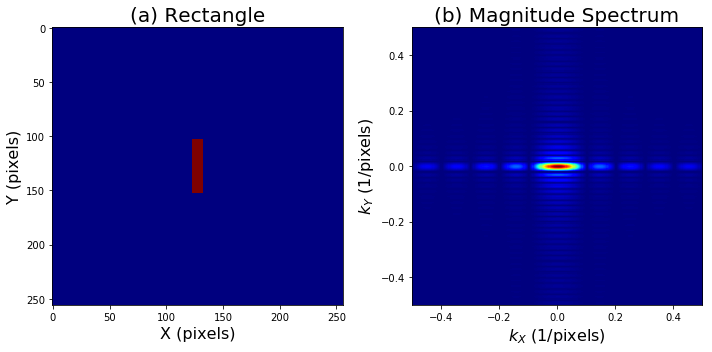

In [11]:
# . . Make two lines example
nx,ny=256,256
s=(nx,ny) # . . Make tuple with correct dimensions
img = np.zeros(s)

xline = range(0,nx-1,1)
yline = range(0,ny-1,1)

# . . Let's create a 2D Boxcar
#img[123:133,123:133]=1.  # Narrow boxcar - wide spectra
#img[108:148,108:148]=1.   # Wide boxcar - narrow spectra
img[103:153,123:133]=1.  # Unequal boxcar - asymetric spectra
  
# . . Take a 2D Fourier transform
fft_img = np.fft.fft2(img)/(nx*ny)

# . . Calculate the magnitude spectrum 
magnitude_spectrum = np.abs(np.fft.fftshift(fft_img)) 

# . . Plotting section
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img,aspect='auto',cmap='jet')
plt.xlabel('X (pixels)',size=16)
plt.ylabel('Y (pixels)',size=16)
plt.title('(a) Rectangle',size=20)

plt.subplot(122)
plt.imshow(magnitude_spectrum,aspect='auto',cmap='jet',extent=[-0.5,0.5,-0.5,0.5])
plt.xlabel('$k_X$ (1/pixels)',size=16)
plt.ylabel('$k_Y$ (1/pixels)',size=16)
plt.title('(b) Magnitude Spectrum',size=20)

# . . Let's look at the output
plt.tight_layout() 
plt.show()

**Figure 7. (a) Example of a 2D rectangle function along with (b) the associated 2D Fourier magnitude spectrum.**

We can also look at this in 3D using some fancy matplotlib graphics tools:

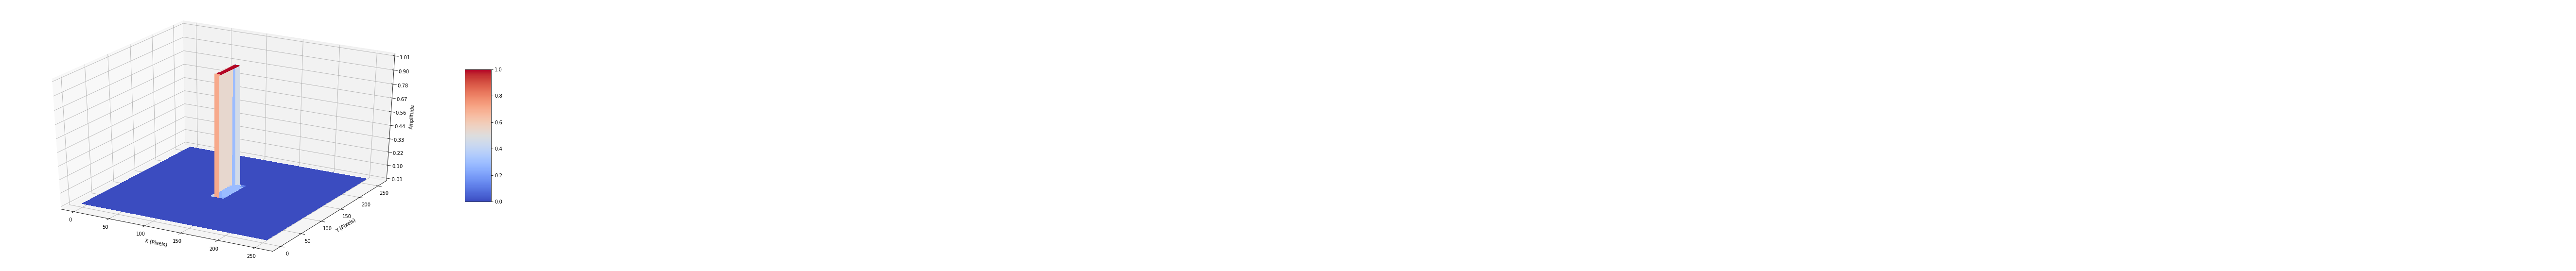

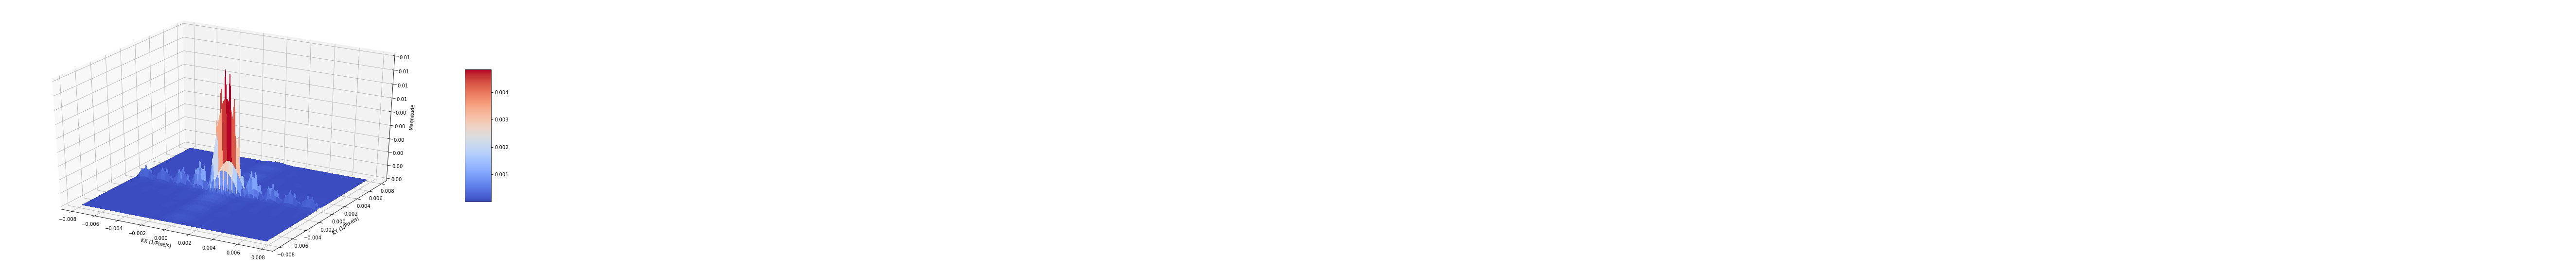

In [15]:
# . . Or let's look at it in 3D!
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(20, 10))
ax = fig.gca(projection='3d')

# Make [X,Y] meshgrid for 3D plotting.
X = np.arange(0, nx, 1,)
Y = np.arange(0, nx, 1.)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, img, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X (Pixels)')
ax.set_ylabel('Y (Pixels)')
ax.set_zlabel('Amplitude')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#####################

fig = plt.figure(figsize=(20, 10))
ax = fig.gca(projection='3d')

# Make [KX,KY] meshgrid for 3D Fourier plotting.
KX = np.arange(-2/nx,2/nx, 4/nx/nx)
KY = np.arange(-2/ny,2/ny, 4/ny/ny)
KX, KY = np.meshgrid(KX, KY)

# Plot the surface.
surf = ax.plot_surface(KX, KY, magnitude_spectrum, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('KX (1/Pixels)')
ax.set_ylabel('KY (1/Pixels)')
ax.set_zlabel('Magnitude')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**Figure 8. (a) Example of a 2D rectangle function along with (b) the associated 2D Fourier magnitude spectrum ... but now in 3D.**


## Example 2 - 2D Gaussian Centered at Origin

A 2D Gaussian centered at the origin can be written as the following:

$$ f(x,y) = \mathrm{e}^{-r^2/(2\sigma)^2}= \mathrm{e}^{-(x^2+y^2)/(2\sigma^2)} \tag{25} $$

where $r^2=x^2+y^2$.  The 2D Fourier Transform of this function is given by:

$$\widehat{F}(k_x,k_y) = \sigma^2 \mathrm{e}^{-\sigma^2 k^2} = \sigma^2 \mathrm{e}^{-\sigma^2(k_x^2+k_y^2)}, \tag{26}$$

where $k=\pm\sqrt{k_x^2+k_y^2}$.  Again, you'll notice that the $\sigma$ in the time-domain expression is in the denominator of the exponential function, whereas it is in the numerator of the Fourier domain expression.  Thus, again, "squeezing" in one domain leads to "expansion" in the conjugate Fourier domain!

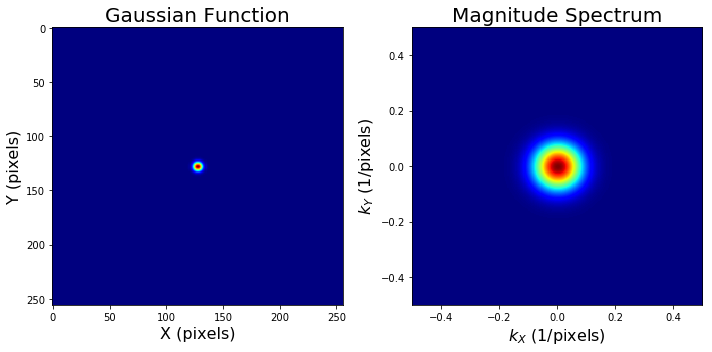

In [22]:
# . . Make two lines example
nx,ny=256,256
sig1 = 4# 100 # sigma (try 4 and 100)
s=(nx,ny) # . . Make tuple with correct dimensions
img = np.zeros(s)

xline = range(0,nx-1,1)
yline = range(0,ny-1,1)

# . . Let's create some lines
for ix in xline:
    for iy in yline:
        img[ix,iy]=np.exp(-((ix-nx/2)**2+(iy-ny/2)**2)/(4*sig1))
   
# . . Take a 2D Fourier transform
fft_img =np.fft.fft2(img)/(nx*ny)

# . . Calculate the spectrum 
magnitude_spectrum = np.abs(np.fft.fftshift(fft_img)) 

# . . Plotting section
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img,aspect='auto',cmap='jet')
plt.xlabel('X (pixels)',size=16)
plt.ylabel('Y (pixels)',size=16)
plt.title('Gaussian Function',size=20)

plt.subplot(122)
plt.imshow(magnitude_spectrum,aspect='auto',cmap='jet',extent=[-0.5,0.5,-0.5,0.5])
plt.xlabel('$k_X$ (1/pixels)',size=16)
plt.ylabel('$k_Y$ (1/pixels)',size=16)
plt.title('Magnitude Spectrum',size=20)

# . . Let's look at the output
plt.tight_layout() 
plt.show()

**Figure 9. (a) Example of a 2D Gaussian function along with (b) the associated 2D Fourier magnitude spectrum.**

## Example 3 - The Airy Disk

The idea of an [Airy disk](https://en.wikipedia.org/wiki/Airy_disk#Mathematical_details) arises in [Fourier Optics](https://en.wikipedia.org/wiki/Fourier_optics) involving problems associated with handling cylindrical lenses.  The Airy disk is a disk of radius $a$ centered at the origin can be written as:

$$f(x,y) = \left\{
\begin{array}{c}
1, \quad |r|<a,\\
0, \quad |r|\ge a.\\
\end{array}
\right. \tag{27}
$$

Again with $k=\pm \sqrt{k_x^2+k_y^2}$, we may write the 2D Fourier Transform of this function is 

$$\widehat{F}(k_x,k_y) = \frac{ a}{k} \, J_1\left(\frac{ak}{2}\right)\tag{28}$$

where $J_1$ is a [Bessel Function](http://mathworld.wolfram.com/BesselFunctionoftheFirstKind.html) of the first kind (where the $1$ is the order of the Bessel function).  If you are interested in seeing the mathematical proof of this transformation, you can find details located [here](https://adriftjustoffthecoast.wordpress.com/2013/06/06/2d-fourier-transform-of-the-unit-disk/).  **Note that this function is the 2D cylindrical coordinate equivalent of the 1D sinc function!**

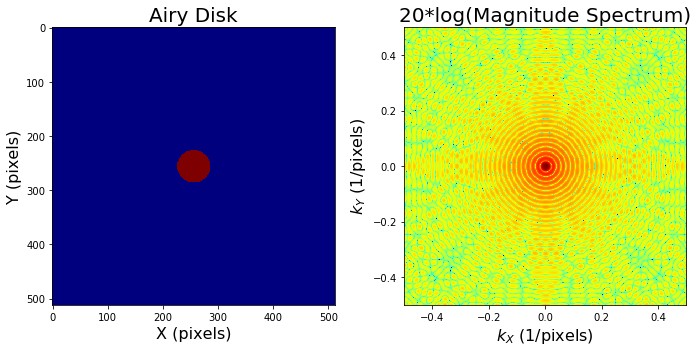

In [20]:
# . . Make two lines example
nx,ny=512,512
aa = 30 # Radius of disk (try 20, 30 and 40)
s=(nx,ny) # . . Make tuple with correct dimensions
img = np.zeros(s)

xline = range(0,nx-1,1)
yline = range(0,ny-1,1)

# . . Let's create some lines
for ix in xline:
    for iy in yline:
        r = np.sqrt(((ix-nx/2)**2+(iy-ny/2)**2))
        if (r < aa):
            img[ix,iy]=1.
   
# . . Take a 2D Fourier transform
fft_img = np.fft.fft2(img)/(nx*ny)

# . . Calculate the spectrum 
magnitude_spectrum = np.abs(np.fft.fftshift(fft_img)) 

# . . Plotting section
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img,aspect='auto',cmap='jet')
plt.xlabel('X (pixels)',size=16)
plt.ylabel('Y (pixels)',size=16)
plt.title('Airy Disk',size=20)

plt.subplot(122)
plt.imshow(20*np.log(magnitude_spectrum),aspect='auto',cmap='jet',extent=[-0.5,0.5,-0.5,0.5])
plt.xlabel('$k_X$ (1/pixels)',size=16)
plt.ylabel('$k_Y$ (1/pixels)',size=16)
plt.title('20*log(Magnitude Spectrum)',size=20)

# . . Let's look at the output
plt.tight_layout() 
plt.show()

**Figure 10. (a) Example of a 2D Airy function along with (b) the associated 2D Fourier magnitude spectrum.**


**Q:** Why is this not a perfect image of the 2D equivalent of the 1D sinc function?

## Example 4 - 2D Impulse Train

The 2D extension of the 1D impulse train (or Shah Function) is an important function for the digital sampling of continuous 2D fields. 

<img src="Fig/2.3 2D_Comb.png" width="400">

**Figure 11.  Illustration of a 2D impulse train commonly used in digital sampling of 2D continuous signals.  Note that the $\delta$-function spacing in the $x$ direction is $X$, while that in the $y$ direction is $Y$.**

The 2D Impulse Train in the time domain is written as:

$$ III_{m,n}(x,y) = \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} \delta(x-mX)\delta(y-nY) \tag{29} $$

The FT of the 2D Impulse Train is given by

$$ \mathcal{F}_{2D}\left[III_{m,n}(x,y)\right] = \frac{1}{XY} \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty} \delta(k_x-m/X)\delta(k_y-n/Y) \tag{30} $$

# Looking ahead - Image Filtering

To get a better idea of why we might be looking at the 2D Fourier spectra, let's look at the example in Figure 12.  The upper panels are in the time domain, while the lower panels are the corresponding 2D frequency spectra.  The left panels show the original image.  The middle panels show what happens if we reject everything in the spectra falling outside of the 2D Airy disk - effectively performing a low-pass filter. The right panels are the complement to central panels - effectivly performing a high-pass filter.

<img src="Fig/2.3 2D_Filtering_example.png" width="800">

**Figure 12. 2D Filtering example where a hole is punched out of the 2D Fourier spectrum and then brought back into the time domain. Left panels: Original image and spectrum.  Middle panels: Low-pass filtered image and spectrum.  Right panels: High-pass filtered image and spectrum.**

# Looking ahead - Geophysical Filtering

Figure 13 is a single shot-gather extracted from a 2D Madagascar data set.  You'll notice a number of different arrivals including direct wave, reflections and ground roll.  How would you go about removing the unwanted groundroll?

<img src="Fig/2.3 GroundRoll.png" width="800">

**Figure 13. A 2D seismic shot gather illustrating strong reflections and groundroll arrivals.  What strategy could you use to remove the unwanted groundroll?**

## Parting thoughts

Understanding the structures of 2D Fourier Transforms - particularly, how different features like lines, disks and points map between the time and frequency domains is very important in geophysical data processing.  In particular, you may be looking to filter out certain types of coherent noise based on some Fourier attribute such as dip, spectral location, etc.  This is very hard to do without knowing where these types of noise fall in Fourier-land!

Next step: Linear time-invariant (LTI) systems.  

## Additional References

1. Bracewell, R.N., 1965, The Fourier Transform and Applications, McGraw-Hill, New York.
2. James, J.F., 2011, A Student's Guide to Fourier Transforms, 3rd ed, Cambridge University Press.
